## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

# Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("../Resources/charity_data.csv")
# Preview dataframe 
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
clean_application_df = application_df.drop(['EIN','NAME'], axis = 1)
# Preview dataframe 
clean_application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
clean_application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_type = clean_application_df['APPLICATION_TYPE'].value_counts()
application_type

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# Set cutoff value
app_type_cutoff = 500
application_type_df = application_type.to_frame()
# Use the variable name `application_types_to_replace`
application_types_to_replace = []
# Create list of records that will be updated
for index in application_type_df.index:
    if application_type_df['APPLICATION_TYPE'].loc[index] < app_type_cutoff:
        application_types_to_replace.append(index)
# Replace in dataframe
for app in application_types_to_replace:
    clean_application_df['APPLICATION_TYPE'] = clean_application_df['APPLICATION_TYPE'].replace(app,"Other")
# Check to make sure binning was successful
clean_application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
classication_remove = clean_application_df['CLASSIFICATION'].value_counts()
classication_remove

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_one_instance = 1
classication__remove_df = classication_remove.to_frame()
classifications_to_remove = []
# Create list of 'Classifications' that only appeared once
for index in classication__remove_df.index:
    if classication__remove_df['CLASSIFICATION'].loc[index] <= classification_one_instance:
        classifications_to_remove.append(index)
# Remove single instance classifications from the dataframe
for cls1 in classifications_to_remove:
    index_to_remove = clean_application_df[clean_application_df['CLASSIFICATION'] == cls1].index
    clean_application_df.drop(index_to_remove , inplace = True)
clean_application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1237        9
C1235        9
C7210        7
C4100        6
C1720        6
C2400        6
C1600        5
C1257        5
C1260        3
C2710        3
C0           3
C1267        2
C1256        2
C1234        2
C1246        2
C3200        2
Name: CLASSIFICATION, dtype: int64

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# Set cutoff value
classification_rename_cutoff = 1000
classication_rename = clean_application_df['CLASSIFICATION'].value_counts()
classication_rename_df = classication_rename.to_frame()
# Use the variable name `classifications_to_replace`
classifications_to_replace = []
# Create list of records that will be updated
for index in classication_rename_df.index:
    if classication_rename_df['CLASSIFICATION'].loc[index] <= classification_rename_cutoff:
        classifications_to_replace.append(index)
# Replace in dataframe
for cls2 in classifications_to_replace:
    clean_application_df['CLASSIFICATION'] = clean_application_df['CLASSIFICATION'].replace(cls2,"Other") 
# Check to make sure binning was successful
clean_application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2235
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
clean_application_dummies = pd.get_dummies(clean_application_df, drop_first = False)
clean_application_dummies.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [10]:
# Split our preprocessed data into our features and target arrays
y = clean_application_dummies['IS_SUCCESSFUL'].values
X = clean_application_dummies.drop('IS_SUCCESSFUL', axis = 1)
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24)

In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

## Optimization 01
#### - Activation Function for hidden layers:  Sigmoid
#### - Number of layers: 2
#### - Unit count: 23,23
#### - max Epoch: 200

In [12]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_1 = tf.keras.models.Sequential()
# First hidden layer
nn_1.add(tf.keras.layers.Dense(units=23, activation = "sigmoid", input_dim = 43))
# Second hidden layer
nn_1.add(tf.keras.layers.Dense(units=23, activation = "sigmoid"))
# Output layer
nn_1.add(tf.keras.layers.Dense(units=1, activation = "sigmoid"))
# Check the structure of the model
nn_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 23)                1012      
                                                                 
 dense_1 (Dense)             (None, 23)                552       
                                                                 
 dense_2 (Dense)             (None, 1)                 24        
                                                                 
Total params: 1,588
Trainable params: 1,588
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile the model
nn_1.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [14]:
# Train the model
fit_model_1 = nn_1.fit(X_train_scaled, y_train, epochs = 200)

Epoch 1/200
804/804 [==============================] - 1s 579us/step - loss: 0.6060 - accuracy: 0.6970
Epoch 2/200
804/804 [==============================] - 0s 564us/step - loss: 0.5730 - accuracy: 0.7242
Epoch 3/200
804/804 [==============================] - 0s 567us/step - loss: 0.5693 - accuracy: 0.7255
Epoch 4/200
804/804 [==============================] - 0s 572us/step - loss: 0.5660 - accuracy: 0.7253
Epoch 5/200
804/804 [==============================] - 0s 574us/step - loss: 0.5629 - accuracy: 0.7262
Epoch 6/200
804/804 [==============================] - 0s 563us/step - loss: 0.5605 - accuracy: 0.7282
Epoch 7/200
804/804 [==============================] - 0s 573us/step - loss: 0.5588 - accuracy: 0.7298
Epoch 8/200
804/804 [==============================] - 0s 571us/step - loss: 0.5571 - accuracy: 0.7297
Epoch 9/200
804/804 [==============================] - 0s 562us/step - loss: 0.5556 - accuracy: 0.7296
Epoch 10/200
804/804 [==============================] - 0s 562us/step - l

804/804 [==============================] - 1s 685us/step - loss: 0.5405 - accuracy: 0.7368
Epoch 80/200
804/804 [==============================] - 1s 691us/step - loss: 0.5406 - accuracy: 0.7367
Epoch 81/200
804/804 [==============================] - 1s 699us/step - loss: 0.5406 - accuracy: 0.7374
Epoch 82/200
804/804 [==============================] - 1s 689us/step - loss: 0.5404 - accuracy: 0.7366
Epoch 83/200
804/804 [==============================] - 1s 694us/step - loss: 0.5403 - accuracy: 0.7373
Epoch 84/200
804/804 [==============================] - 1s 738us/step - loss: 0.5405 - accuracy: 0.7360
Epoch 85/200
804/804 [==============================] - 1s 653us/step - loss: 0.5402 - accuracy: 0.7376
Epoch 86/200
804/804 [==============================] - 1s 724us/step - loss: 0.5404 - accuracy: 0.7368
Epoch 87/200
804/804 [==============================] - 1s 663us/step - loss: 0.5403 - accuracy: 0.7371
Epoch 88/200
804/804 [==============================] - 1s 688us/step - loss:

804/804 [==============================] - 1s 698us/step - loss: 0.5376 - accuracy: 0.7391
Epoch 158/200
804/804 [==============================] - 1s 717us/step - loss: 0.5376 - accuracy: 0.7388
Epoch 159/200
804/804 [==============================] - 1s 683us/step - loss: 0.5374 - accuracy: 0.7379
Epoch 160/200
804/804 [==============================] - 1s 686us/step - loss: 0.5371 - accuracy: 0.7381
Epoch 161/200
804/804 [==============================] - 1s 678us/step - loss: 0.5374 - accuracy: 0.7387
Epoch 162/200
804/804 [==============================] - 1s 701us/step - loss: 0.5375 - accuracy: 0.7387
Epoch 163/200
804/804 [==============================] - 1s 682us/step - loss: 0.5374 - accuracy: 0.7395
Epoch 164/200
804/804 [==============================] - 1s 687us/step - loss: 0.5373 - accuracy: 0.7377
Epoch 165/200
804/804 [==============================] - 1s 691us/step - loss: 0.5375 - accuracy: 0.7400
Epoch 166/200
804/804 [==============================] - 1s 707us/ste

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5550 - accuracy: 0.7287 - 213ms/epoch - 795us/step
Loss: 0.5549887418746948, Accuracy: 0.7286731004714966


In [16]:
# Export our model to HDF5 file
nn_1.save("AlphabetSoupCharity_OPT01.h5")

<AxesSubplot:>

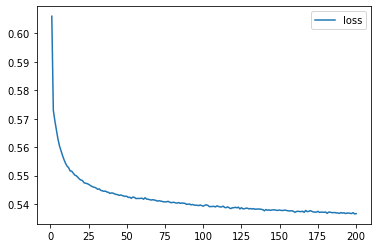

In [17]:
# Create a DataFrame containing training history
history_1_df = pd.DataFrame(fit_model_1.history)

# Increase the index by 1 to match the number of epochs
history_1_df.index += 1

# Plot the loss
history_1_df.plot(y="loss")

<AxesSubplot:>

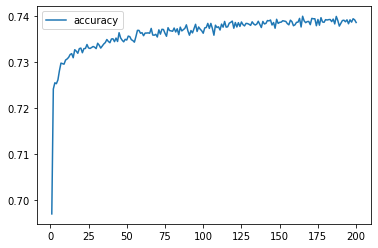

In [18]:
# Plot the accuracy
history_1_df.plot(y="accuracy")

## Optimization 02
#### - Activation Function for hidden layers:  Relu
#### - Number of layers: 2
#### - Unit count: 23,23
#### - max Epoch: 200

In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_2 = tf.keras.models.Sequential()
# First hidden layer
nn_2.add(tf.keras.layers.Dense(units=23, activation = "relu", input_dim = 43))
# Second hidden layer
nn_2.add(tf.keras.layers.Dense(units=23, activation = "relu"))
# Output layer
nn_2.add(tf.keras.layers.Dense(units=1, activation = "sigmoid"))
# Check the structure of the model
nn_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 23)                1012      
                                                                 
 dense_4 (Dense)             (None, 23)                552       
                                                                 
 dense_5 (Dense)             (None, 1)                 24        
                                                                 
Total params: 1,588
Trainable params: 1,588
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compile the model
nn_2.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [21]:
# Train the model
fit_model_2 = nn_2.fit(X_train_scaled, y_train, epochs = 200)

Epoch 1/200
804/804 [==============================] - 1s 847us/step - loss: 0.5797 - accuracy: 0.7120
Epoch 2/200
804/804 [==============================] - 1s 854us/step - loss: 0.5576 - accuracy: 0.7275
Epoch 3/200
804/804 [==============================] - 1s 826us/step - loss: 0.5535 - accuracy: 0.7305
Epoch 4/200
804/804 [==============================] - 1s 861us/step - loss: 0.5519 - accuracy: 0.7308
Epoch 5/200
804/804 [==============================] - 1s 804us/step - loss: 0.5501 - accuracy: 0.7312
Epoch 6/200
804/804 [==============================] - 1s 901us/step - loss: 0.5493 - accuracy: 0.7303
Epoch 7/200
804/804 [==============================] - 1s 829us/step - loss: 0.5483 - accuracy: 0.7325
Epoch 8/200
804/804 [==============================] - 1s 819us/step - loss: 0.5475 - accuracy: 0.7329
Epoch 9/200
804/804 [==============================] - 1s 882us/step - loss: 0.5473 - accuracy: 0.7321
Epoch 10/200
804/804 [==============================] - 1s 816us/step - l

804/804 [==============================] - 1s 660us/step - loss: 0.5388 - accuracy: 0.7362
Epoch 80/200
804/804 [==============================] - 1s 737us/step - loss: 0.5386 - accuracy: 0.7381
Epoch 81/200
804/804 [==============================] - 1s 754us/step - loss: 0.5388 - accuracy: 0.7379
Epoch 82/200
804/804 [==============================] - 1s 691us/step - loss: 0.5386 - accuracy: 0.7379
Epoch 83/200
804/804 [==============================] - 1s 717us/step - loss: 0.5389 - accuracy: 0.7388
Epoch 84/200
804/804 [==============================] - 1s 752us/step - loss: 0.5386 - accuracy: 0.7390
Epoch 85/200
804/804 [==============================] - 1s 730us/step - loss: 0.5388 - accuracy: 0.7383
Epoch 86/200
804/804 [==============================] - 1s 659us/step - loss: 0.5387 - accuracy: 0.7381
Epoch 87/200
804/804 [==============================] - 1s 714us/step - loss: 0.5388 - accuracy: 0.7377
Epoch 88/200
804/804 [==============================] - 1s 700us/step - loss:

804/804 [==============================] - 1s 696us/step - loss: 0.5367 - accuracy: 0.7389
Epoch 158/200
804/804 [==============================] - 1s 703us/step - loss: 0.5368 - accuracy: 0.7397
Epoch 159/200
804/804 [==============================] - 1s 704us/step - loss: 0.5369 - accuracy: 0.7391
Epoch 160/200
804/804 [==============================] - 1s 707us/step - loss: 0.5368 - accuracy: 0.7399
Epoch 161/200
804/804 [==============================] - 1s 672us/step - loss: 0.5366 - accuracy: 0.7400
Epoch 162/200
804/804 [==============================] - 1s 716us/step - loss: 0.5367 - accuracy: 0.7393
Epoch 163/200
804/804 [==============================] - 1s 669us/step - loss: 0.5365 - accuracy: 0.7388
Epoch 164/200
804/804 [==============================] - 1s 734us/step - loss: 0.5366 - accuracy: 0.7385
Epoch 165/200
804/804 [==============================] - 1s 670us/step - loss: 0.5368 - accuracy: 0.7391
Epoch 166/200
804/804 [==============================] - 1s 683us/ste

In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5549 - accuracy: 0.7289 - 261ms/epoch - 974us/step
Loss: 0.554900050163269, Accuracy: 0.728906512260437


In [23]:
# Export our model to HDF5 file
nn_2.save("AlphabetSoupCharity_OPT02.h5")

<AxesSubplot:>

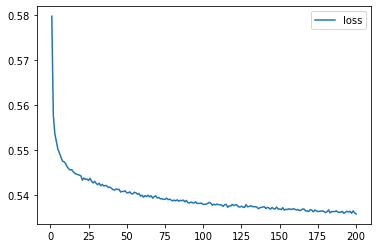

In [24]:
# Create a DataFrame containing training history
history_2_df = pd.DataFrame(fit_model_2.history)

# Increase the index by 1 to match the number of epochs
history_2_df.index += 1

# Plot the loss
history_2_df.plot(y="loss")

<AxesSubplot:>

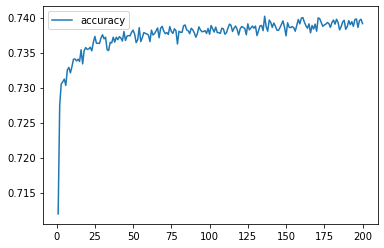

In [25]:
# Plot the accuracy
history_2_df.plot(y="accuracy")

## Optimization 03
#### - Activation Function for hidden layers:  Tanh
#### - Number of layers: 2
#### - Unit count: 23, 23
#### - max Epoch: 200

In [26]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_3 = tf.keras.models.Sequential()
# First hidden layer
nn_3.add(tf.keras.layers.Dense(units=23, activation = "tanh", input_dim = 43))
# Second hidden layer
nn_3.add(tf.keras.layers.Dense(units=23, activation = "tanh"))
# Output layer
nn_3.add(tf.keras.layers.Dense(units=1, activation = "sigmoid"))
# Check the structure of the model
nn_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 23)                1012      
                                                                 
 dense_7 (Dense)             (None, 23)                552       
                                                                 
 dense_8 (Dense)             (None, 1)                 24        
                                                                 
Total params: 1,588
Trainable params: 1,588
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compile the model
nn_3.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [28]:
# Train the model
fit_model_3 = nn_3.fit(X_train_scaled, y_train, epochs = 200)

Epoch 1/200
804/804 [==============================] - 1s 817us/step - loss: 0.5820 - accuracy: 0.7134
Epoch 2/200
804/804 [==============================] - 1s 902us/step - loss: 0.5585 - accuracy: 0.7302
Epoch 3/200
804/804 [==============================] - 1s 864us/step - loss: 0.5547 - accuracy: 0.7301
Epoch 4/200
804/804 [==============================] - 1s 852us/step - loss: 0.5525 - accuracy: 0.7317
Epoch 5/200
804/804 [==============================] - 1s 890us/step - loss: 0.5508 - accuracy: 0.7335
Epoch 6/200
804/804 [==============================] - 1s 804us/step - loss: 0.5496 - accuracy: 0.7317
Epoch 7/200
804/804 [==============================] - 1s 824us/step - loss: 0.5491 - accuracy: 0.7335
Epoch 8/200
804/804 [==============================] - 1s 857us/step - loss: 0.5479 - accuracy: 0.7344
Epoch 9/200
804/804 [==============================] - 1s 885us/step - loss: 0.5477 - accuracy: 0.7343
Epoch 10/200
804/804 [==============================] - 1s 866us/step - l

804/804 [==============================] - 1s 687us/step - loss: 0.5375 - accuracy: 0.7391
Epoch 80/200
804/804 [==============================] - 1s 712us/step - loss: 0.5374 - accuracy: 0.7381
Epoch 81/200
804/804 [==============================] - 1s 745us/step - loss: 0.5374 - accuracy: 0.7381
Epoch 82/200
804/804 [==============================] - 1s 738us/step - loss: 0.5376 - accuracy: 0.7393
Epoch 83/200
804/804 [==============================] - 1s 773us/step - loss: 0.5375 - accuracy: 0.7390
Epoch 84/200
804/804 [==============================] - 1s 731us/step - loss: 0.5374 - accuracy: 0.7386
Epoch 85/200
804/804 [==============================] - 1s 707us/step - loss: 0.5373 - accuracy: 0.7389
Epoch 86/200
804/804 [==============================] - 1s 703us/step - loss: 0.5372 - accuracy: 0.7391
Epoch 87/200
804/804 [==============================] - 1s 706us/step - loss: 0.5370 - accuracy: 0.7389
Epoch 88/200
804/804 [==============================] - 1s 757us/step - loss:

804/804 [==============================] - 1s 715us/step - loss: 0.5350 - accuracy: 0.7392
Epoch 158/200
804/804 [==============================] - 1s 695us/step - loss: 0.5351 - accuracy: 0.7398
Epoch 159/200
804/804 [==============================] - 1s 754us/step - loss: 0.5352 - accuracy: 0.7391
Epoch 160/200
804/804 [==============================] - 1s 660us/step - loss: 0.5350 - accuracy: 0.7395
Epoch 161/200
804/804 [==============================] - 1s 735us/step - loss: 0.5350 - accuracy: 0.7400
Epoch 162/200
804/804 [==============================] - 1s 686us/step - loss: 0.5350 - accuracy: 0.7402
Epoch 163/200
804/804 [==============================] - 1s 697us/step - loss: 0.5351 - accuracy: 0.7398
Epoch 164/200
804/804 [==============================] - 1s 699us/step - loss: 0.5350 - accuracy: 0.7402
Epoch 165/200
804/804 [==============================] - 1s 699us/step - loss: 0.5350 - accuracy: 0.7398
Epoch 166/200
804/804 [==============================] - 1s 722us/ste

In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5522 - accuracy: 0.7301 - 195ms/epoch - 727us/step
Loss: 0.5521658062934875, Accuracy: 0.7300735116004944


In [30]:
# Export our model to HDF5 file
nn_3.save("AlphabetSoupCharity_OPT03.h5")

<AxesSubplot:>

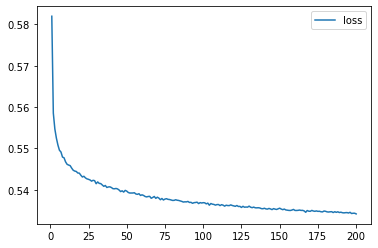

In [31]:
# Create a DataFrame containing training history
history_3_df = pd.DataFrame(fit_model_3.history)

# Increase the index by 1 to match the number of epochs
history_3_df.index += 1

# Plot the loss
history_3_df.plot(y="loss")

<AxesSubplot:>

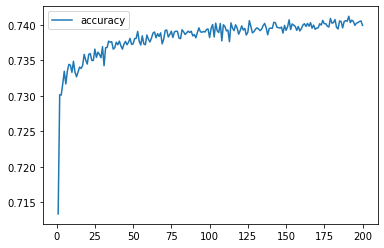

In [32]:
# Plot the accuracy
history_3_df.plot(y="accuracy")

## Optimization 04
#### - Activation Function for hidden layers:  Relu
#### - Number of layers: 2
#### - Unit count: 29, 29
#### - max Epoch: 200

In [33]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_4 = tf.keras.models.Sequential()
# First hidden layer
nn_4.add(tf.keras.layers.Dense(units=29, activation = "relu", input_dim = 43))
# Second hidden layer
nn_4.add(tf.keras.layers.Dense(units=29, activation = "relu"))
# Output layer
nn_4.add(tf.keras.layers.Dense(units=1, activation = "sigmoid"))
# Check the structure of the model
nn_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 29)                1276      
                                                                 
 dense_10 (Dense)            (None, 29)                870       
                                                                 
 dense_11 (Dense)            (None, 1)                 30        
                                                                 
Total params: 2,176
Trainable params: 2,176
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Compile the model
nn_4.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [35]:
# Train the model
fit_model_4 = nn_4.fit(X_train_scaled, y_train, epochs = 200)

Epoch 1/200
804/804 [==============================] - 1s 778us/step - loss: 0.5759 - accuracy: 0.7163
Epoch 2/200
804/804 [==============================] - 1s 902us/step - loss: 0.5566 - accuracy: 0.7288
Epoch 3/200
804/804 [==============================] - 1s 926us/step - loss: 0.5536 - accuracy: 0.7300
Epoch 4/200
804/804 [==============================] - 1s 831us/step - loss: 0.5513 - accuracy: 0.7311
Epoch 5/200
804/804 [==============================] - 1s 852us/step - loss: 0.5505 - accuracy: 0.7306
Epoch 6/200
804/804 [==============================] - 1s 862us/step - loss: 0.5493 - accuracy: 0.7312
Epoch 7/200
804/804 [==============================] - 1s 845us/step - loss: 0.5491 - accuracy: 0.7319
Epoch 8/200
804/804 [==============================] - 1s 862us/step - loss: 0.5483 - accuracy: 0.7309
Epoch 9/200
804/804 [==============================] - 1s 911us/step - loss: 0.5476 - accuracy: 0.7334
Epoch 10/200
804/804 [==============================] - 1s 872us/step - l

804/804 [==============================] - 1s 743us/step - loss: 0.5384 - accuracy: 0.7384
Epoch 80/200
804/804 [==============================] - 1s 700us/step - loss: 0.5383 - accuracy: 0.7381
Epoch 81/200
804/804 [==============================] - 1s 737us/step - loss: 0.5384 - accuracy: 0.7378
Epoch 82/200
804/804 [==============================] - 1s 732us/step - loss: 0.5379 - accuracy: 0.7380
Epoch 83/200
804/804 [==============================] - 1s 690us/step - loss: 0.5383 - accuracy: 0.7377
Epoch 84/200
804/804 [==============================] - 1s 702us/step - loss: 0.5383 - accuracy: 0.7375
Epoch 85/200
804/804 [==============================] - 1s 708us/step - loss: 0.5380 - accuracy: 0.7392
Epoch 86/200
804/804 [==============================] - 1s 708us/step - loss: 0.5378 - accuracy: 0.7393
Epoch 87/200
804/804 [==============================] - 1s 757us/step - loss: 0.5380 - accuracy: 0.7394
Epoch 88/200
804/804 [==============================] - 1s 705us/step - loss:

804/804 [==============================] - 1s 731us/step - loss: 0.5356 - accuracy: 0.7392
Epoch 158/200
804/804 [==============================] - 1s 682us/step - loss: 0.5358 - accuracy: 0.7380
Epoch 159/200
804/804 [==============================] - 1s 716us/step - loss: 0.5356 - accuracy: 0.7388
Epoch 160/200
804/804 [==============================] - 1s 686us/step - loss: 0.5352 - accuracy: 0.7396
Epoch 161/200
804/804 [==============================] - 1s 699us/step - loss: 0.5355 - accuracy: 0.7383
Epoch 162/200
804/804 [==============================] - 1s 699us/step - loss: 0.5357 - accuracy: 0.7389
Epoch 163/200
804/804 [==============================] - 1s 719us/step - loss: 0.5356 - accuracy: 0.7390
Epoch 164/200
804/804 [==============================] - 1s 705us/step - loss: 0.5356 - accuracy: 0.7397
Epoch 165/200
804/804 [==============================] - 1s 704us/step - loss: 0.5355 - accuracy: 0.7392
Epoch 166/200
804/804 [==============================] - 1s 707us/ste

In [36]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5580 - accuracy: 0.7315 - 199ms/epoch - 742us/step
Loss: 0.5579537749290466, Accuracy: 0.7314739227294922


In [37]:
# Export our model to HDF5 file
nn_4.save("AlphabetSoupCharity_OPT04.h5")

<AxesSubplot:>

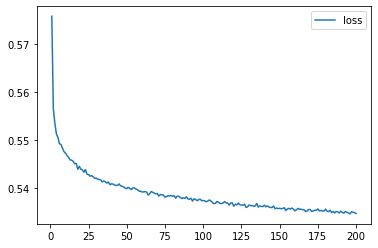

In [38]:
# Create a DataFrame containing training history
history_4_df = pd.DataFrame(fit_model_4.history)

# Increase the index by 1 to match the number of epochs
history_4_df.index += 1

# Plot the loss
history_4_df.plot(y="loss")

<AxesSubplot:>

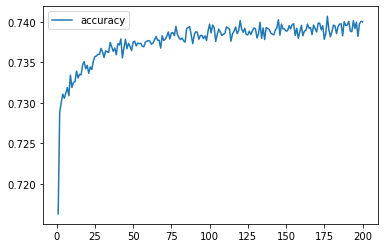

In [39]:
# Plot the accuracy
history_4_df.plot(y="accuracy")

## Optimization 05
#### - Activation Function for hidden layers:  Relu
#### - Number of layers: 3
#### - Unit count: 29, 29, 29
#### - max Epoch: 200

In [40]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_5 = tf.keras.models.Sequential()
# First hidden layer
nn_5.add(tf.keras.layers.Dense(units=29, activation = "relu", input_dim = 43))
# Second hidden layer
nn_5.add(tf.keras.layers.Dense(units=29, activation = "relu"))
# Third hidden layer
nn_5.add(tf.keras.layers.Dense(units=29, activation = "relu"))
# Output layer
nn_5.add(tf.keras.layers.Dense(units=1, activation = "sigmoid"))
# Check the structure of the model
nn_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 29)                1276      
                                                                 
 dense_13 (Dense)            (None, 29)                870       
                                                                 
 dense_14 (Dense)            (None, 29)                870       
                                                                 
 dense_15 (Dense)            (None, 1)                 30        
                                                                 
Total params: 3,046
Trainable params: 3,046
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Compile the model
nn_5.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [42]:
# Train the model
fit_model_5 = nn_5.fit(X_train_scaled, y_train, epochs = 200)

Epoch 1/200
804/804 [==============================] - 1s 873us/step - loss: 0.5767 - accuracy: 0.7160
Epoch 2/200
804/804 [==============================] - 1s 958us/step - loss: 0.5561 - accuracy: 0.7291
Epoch 3/200
804/804 [==============================] - 1s 906us/step - loss: 0.5530 - accuracy: 0.7295
Epoch 4/200
804/804 [==============================] - 1s 925us/step - loss: 0.5513 - accuracy: 0.7321
Epoch 5/200
804/804 [==============================] - 1s 932us/step - loss: 0.5504 - accuracy: 0.7303
Epoch 6/200
804/804 [==============================] - 1s 949us/step - loss: 0.5492 - accuracy: 0.7317
Epoch 7/200
804/804 [==============================] - 1s 905us/step - loss: 0.5484 - accuracy: 0.7319
Epoch 8/200
804/804 [==============================] - 1s 886us/step - loss: 0.5480 - accuracy: 0.7330
Epoch 9/200
804/804 [==============================] - 1s 932us/step - loss: 0.5476 - accuracy: 0.7327
Epoch 10/200
804/804 [==============================] - 1s 912us/step - l

804/804 [==============================] - 1s 744us/step - loss: 0.5368 - accuracy: 0.7395
Epoch 80/200
804/804 [==============================] - 1s 752us/step - loss: 0.5369 - accuracy: 0.7384
Epoch 81/200
804/804 [==============================] - 1s 752us/step - loss: 0.5369 - accuracy: 0.7382
Epoch 82/200
804/804 [==============================] - 1s 756us/step - loss: 0.5367 - accuracy: 0.7384
Epoch 83/200
804/804 [==============================] - 1s 885us/step - loss: 0.5368 - accuracy: 0.7387
Epoch 84/200
804/804 [==============================] - 1s 770us/step - loss: 0.5368 - accuracy: 0.7382
Epoch 85/200
804/804 [==============================] - 1s 745us/step - loss: 0.5363 - accuracy: 0.7386
Epoch 86/200
804/804 [==============================] - 1s 752us/step - loss: 0.5365 - accuracy: 0.7390
Epoch 87/200
804/804 [==============================] - 1s 745us/step - loss: 0.5363 - accuracy: 0.7393
Epoch 88/200
804/804 [==============================] - 1s 741us/step - loss:

804/804 [==============================] - 1s 861us/step - loss: 0.5340 - accuracy: 0.7404
Epoch 158/200
804/804 [==============================] - 1s 807us/step - loss: 0.5340 - accuracy: 0.7396
Epoch 159/200
804/804 [==============================] - 1s 796us/step - loss: 0.5346 - accuracy: 0.7392
Epoch 160/200
804/804 [==============================] - 1s 814us/step - loss: 0.5339 - accuracy: 0.7401
Epoch 161/200
804/804 [==============================] - 1s 797us/step - loss: 0.5350 - accuracy: 0.7400
Epoch 162/200
804/804 [==============================] - 1s 817us/step - loss: 0.5340 - accuracy: 0.7394
Epoch 163/200
804/804 [==============================] - 1s 808us/step - loss: 0.5337 - accuracy: 0.7407
Epoch 164/200
804/804 [==============================] - 1s 779us/step - loss: 0.5341 - accuracy: 0.7404
Epoch 165/200
804/804 [==============================] - 1s 789us/step - loss: 0.5338 - accuracy: 0.7395
Epoch 166/200
804/804 [==============================] - 1s 798us/ste

In [43]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_5.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5654 - accuracy: 0.7298 - 227ms/epoch - 847us/step
Loss: 0.5654488205909729, Accuracy: 0.729840099811554


In [44]:
# Export our model to HDF5 file
nn_5.save("AlphabetSoupCharity_OPT05.h5")

<AxesSubplot:>

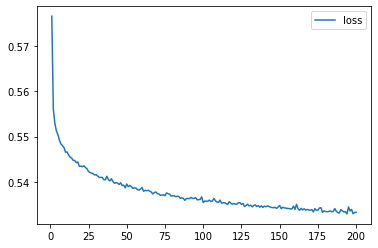

In [45]:
# Create a DataFrame containing training history
history_5_df = pd.DataFrame(fit_model_5.history)

# Increase the index by 1 to match the number of epochs
history_5_df.index += 1

# Plot the loss
history_5_df.plot(y="loss")

<AxesSubplot:>

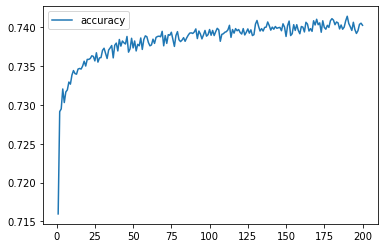

In [46]:
# Plot the accuracy
history_5_df.plot(y="accuracy")

## Optimization 06
#### - Ran hyperparameters

In [47]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_6 = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_6.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=29,
        step=2), activation=activation, input_dim=43))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 10)):
        nn_6.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=29,
            step=2),
            activation=activation))
    
    nn_6.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_6.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_6

In [48]:
# Import the kerastuner library
import kerastuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

C:\Users\tomsa\AppData\Local\Temp/ipykernel_20192/2980860635.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [49]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 00m 22s]
val_accuracy: 0.729840099811554

Best val_accuracy So Far: 0.7324075102806091
Total elapsed time: 00h 08m 39s
INFO:tensorflow:Oracle triggered exit


In [50]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'relu',
 'first_units': 11,
 'num_layers': 7,
 'units_0': 11,
 'units_1': 17,
 'units_2': 25,
 'units_3': 11,
 'units_4': 27,
 'units_5': 21,
 'units_6': 7,
 'units_7': 17,
 'units_8': 11,
 'units_9': 25,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 1,
 'tuner/round': 1,
 'tuner/trial_id': '0020'}

In [51]:
# Evaluate best model against test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5505 - accuracy: 0.7324 - 319ms/epoch - 1ms/step
Loss: 0.550503671169281, Accuracy: 0.7324075102806091


In [52]:
# Export our model to HDF5 file
best_model.save("AlphabetSoupCharity_OPT06.h5")